# 多重ロジスティック解析における多重共線性

## ～実証実験～


In [55]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns

仮想データを作成する。

In [56]:
N=20
a = np.arange(N)
a1 = np.arange(N)
a1[0]=1

b = np.array([0]*int(N/2)+[1]*int(N/2))
b[int(N/2)-5]=1
b[int(N/2)+5]=0

np.random.seed(1234)
r=np.random.random(N)

X1とX2は、非常に強力に、Yを推定する変数である。
しかし、X1とX2は非常に強く相関している。
一方、X3はただのランダム。

In [57]:
data = pd.DataFrame({
    'X1':a,
    'X2':a1,
    'X3':r,
    'Y':b
    })
data

,X1,X2,X3,Y
0,0,1,0.191519,0
1,1,1,0.622109,0
2,2,2,0.437728,0
3,3,3,0.785359,0
4,4,4,0.779976,0
5,5,5,0.272593,1
6,6,6,0.276464,0
7,7,7,0.801872,0
8,8,8,0.958139,0
9,9,9,0.875933,0


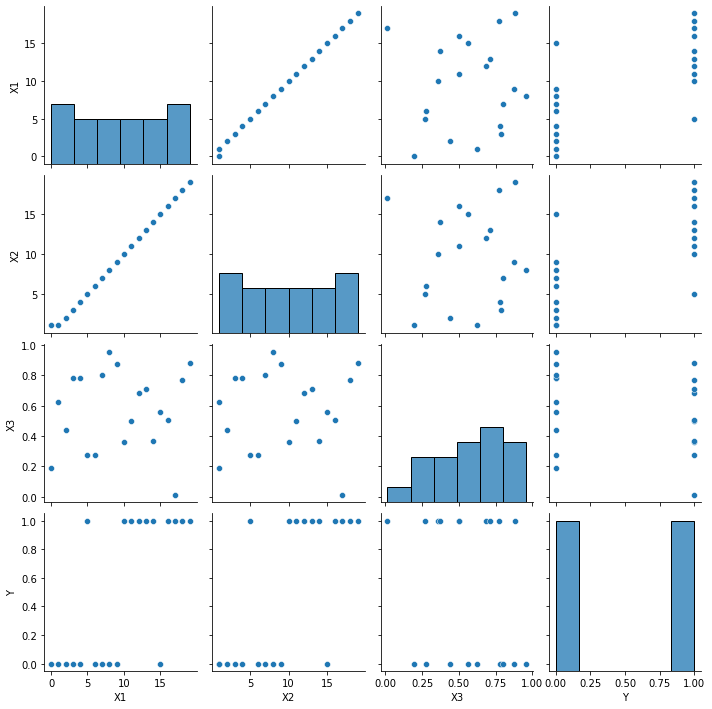

In [58]:
sns.pairplot(data)

単変量で、X1, X2, X3の有意性を確認しておく。

In [42]:
logistic_model = smf.glm(formula = "Y ~ X1", 
                       data = data, 
                       family=sm.families.Binomial(link=sm.genmod.families.links.logit()))
logistic_result = logistic_model.fit() 
logistic_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       18
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7.9965
Date:                Mon, 21 Mar 2022   Deviance:                       15.993
Time:                        13:11:42   Pearson chi2:                     18.4
No. Iterations:                     5   Pseudo R-squ. (CS):             0.4438
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.6020      1.614     -2.232      0.026      -6.764      -0.440
X1             0.3792      0.156      2.425      0.015       0.073       0.686
==============================================================================
"""

In [43]:
logistic_model = smf.glm(formula = "Y ~ X2", 
                       data = data, 
                       family=sm.families.Binomial(link=sm.genmod.families.links.logit()))
logistic_result = logistic_model.fit() 
logistic_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       18
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8.0086
Date:                Mon, 21 Mar 2022   Deviance:                       16.017
Time:                        13:11:47   Pearson chi2:                     18.5
No. Iterations:                     5   Pseudo R-squ. (CS):             0.4431
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.6236      1.612     -2.248      0.025      -6.783      -0.464
X2             0.3809      0.156      2.435      0.015       0.074       0.688
==============================================================================
"""

In [44]:
logistic_model = smf.glm(formula = "Y ~ X3", 
                       data = data, 
                       family=sm.families.Binomial(link=sm.genmod.families.links.logit()))
logistic_result = logistic_model.fit() 
logistic_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       18
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13.279
Date:                Mon, 21 Mar 2022   Deviance:                       26.558
Time:                        13:11:51   Pearson chi2:                     19.9
No. Iterations:                     4   Pseudo R-squ. (CS):            0.05672
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1149      1.166      0.956      0.339      -1.171       3.401
X3            -1.9562      1.869     -1.047      0.295      -5.619       1.706
==============================================================================
"""

以上のとおり、X1,X2は有意で、X3は非有意であった。予想通り。

次に、多変量解析を行う。

Y ~ X1 + X2

Y ~ X1 + X3

Y ~ X1 + X2 + X3

これらを順番に試して、X1,X2,X3のP値に注目。

In [48]:
logistic_model = smf.glm(formula = "Y ~ X1+X2", 
                       data = data, 
                       family=sm.families.Binomial(link=sm.genmod.families.links.logit()))
logistic_result = logistic_model.fit() 
logistic_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7.9687
Date:                Mon, 21 Mar 2022   Deviance:                       15.937
Time:                        13:16:08   Pearson chi2:                     18.0
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4454
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.5291      1.644     -2.147      0.032      -6.751      -0.307
X1            17.4096   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
X2           -17.0370   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
==============================================================================
"""

In [49]:
logistic_model = smf.glm(formula = "Y ~ X1+X3", 
                       data = data, 
                       family=sm.families.Binomial(link=sm.genmod.families.links.logit())                        )
logistic_result = logistic_model.fit() 
logistic_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6.3205
Date:                Mon, 21 Mar 2022   Deviance:                       12.641
Time:                        13:16:10   Pearson chi2:                     18.7
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5296
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1273      1.921     -0.587      0.557      -4.892       2.637
X1             0.4685      0.195      2.398      0.017       0.086       0.852
X3            -5.8227      3.882     -1.500      0.134     -13.431       1.786
==============================================================================
"""

In [50]:
logistic_model = smf.glm(formula = "Y ~ X1+X2+X3", 
                       data = data, 
                       family=sm.families.Binomial(link=sm.genmod.families.links.logit()))
logistic_result = logistic_model.fit() 
logistic_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       16
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6.2032
Date:                Mon, 21 Mar 2022   Deviance:                       12.406
Time:                        13:16:10   Pearson chi2:                     17.6
No. Iterations:                    19   Pseudo R-squ. (CS):             0.5351
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7668      2.111     -0.363      0.716      -4.905       3.371
X1            19.1031   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
X2           -18.6589   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
X3            -5.9542      3.814     -1.561      0.118     -13.429       1.521
==============================================================================
"""

### 結果のまとめ

Y ~ X1 + X2 では、X1もX2もP=0.999と、まったく有意性がなくなった。

Y ~ X1 + X3 では、X1はP=0.017で有意な予測因子になっている。X3は非有意。

Y ~ X1 + X2 + X3 では、再びX1もX2もP=0.999と、まったく有意性がなくなった。

### 追加実験

X1とX3からX4を新たにつくる。

In [65]:
data['X4'] = data['X1'] * 0.5 - data['X3'] * 10
data

,X1,X2,X3,Y,X4
0,0,1,0.191519,0,-1.915195
1,1,1,0.622109,0,-5.721088
2,2,2,0.437728,0,-3.377277
3,3,3,0.785359,0,-6.353586
4,4,4,0.779976,0,-5.799758
5,5,5,0.272593,1,-0.225926
6,6,6,0.276464,0,0.235357
7,7,7,0.801872,0,-4.518722
8,8,8,0.958139,0,-5.581394
9,9,9,0.875933,0,-4.259326


X4も有意な予測因子である。

In [66]:
logistic_model = smf.glm(formula = "Y ~ X4", 
                       data = data, 
                       family=sm.families.Binomial(link=sm.genmod.families.links.logit()))
logistic_result = logistic_model.fit() 
logistic_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       18
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6.9055
Date:                Mon, 21 Mar 2022   Deviance:                       13.811
Time:                        13:20:54   Pearson chi2:                     15.9
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5013
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6817      0.697      0.979      0.328      -0.684       2.047
X4             0.8198      0.367      2.232      0.026       0.100       1.540
==============================================================================
"""

しかし、X1とX4をいっしょにすると、どちらも消える。

In [67]:
logistic_model = smf.glm(formula = "Y ~ X1+X4", 
                       data = data, 
                       family=sm.families.Binomial(link=sm.genmod.families.links.logit()))
logistic_result = logistic_model.fit() 
logistic_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6.3205
Date:                Mon, 21 Mar 2022   Deviance:                       12.641
Time:                        13:21:00   Pearson chi2:                     18.7
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5296
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1273      1.921     -0.587      0.557      -4.892       2.637
X1             0.1774      0.178      0.997      0.319      -0.171       0.526
X4             0.5823      0.388      1.500      0.134      -0.179       1.343
==============================================================================
"""

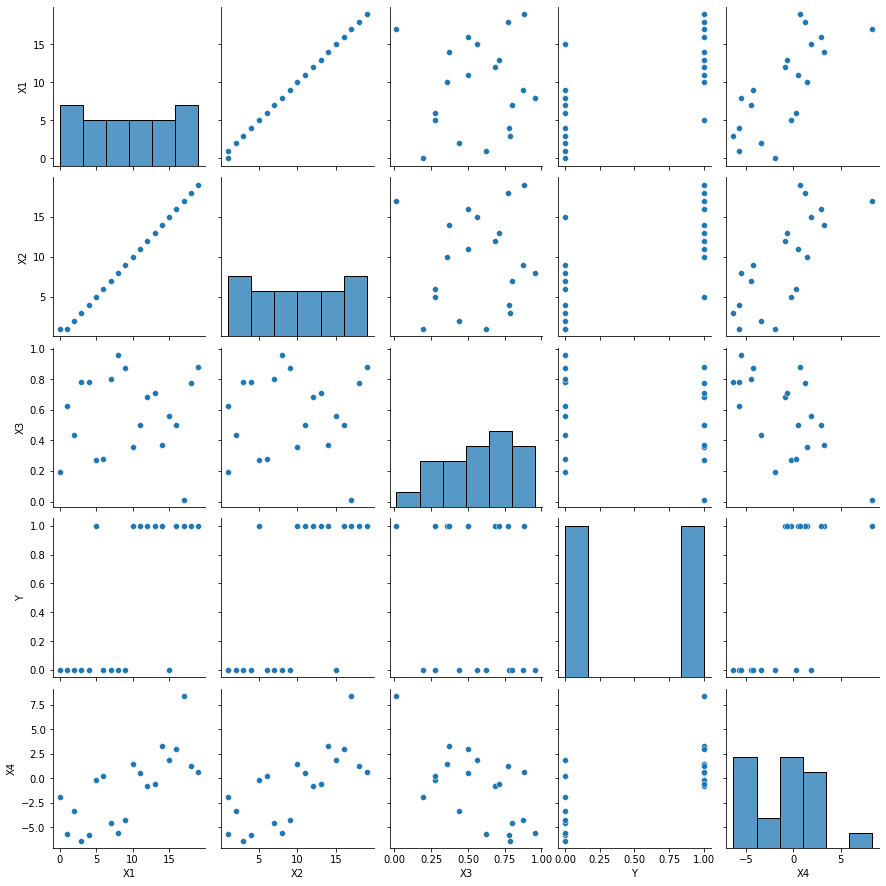

In [68]:
sns.pairplot(data)

相関行列を確認しておく。

In [69]:
data.corr()

,X1,X2,X3,Y,X4
X1,1.000000,0.999370,0.080009,0.693688,0.725205
X2,0.999370,1.000000,0.068146,0.694507,0.732908
X3,0.080009,0.068146,1.000000,-0.239087,-0.628303
Y,0.693688,0.694507,-0.239087,1.000000,0.706552
X4,0.725205,0.732908,-0.628303,0.706552,1.000000
